# Assignment-8

In [2]:
import numpy as np
import matplotlib.pyplot as plt

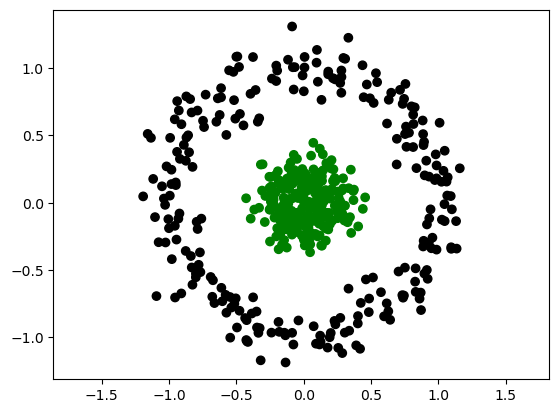

In [3]:
import matplotlib.colors as colors
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
X, y = make_circles(n_samples=500, noise=0.1, factor=0.2, random_state=42)
y[y == 0] = -1  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=colors.ListedColormap(["black", "green"]))
plt.axis('equal')
plt.show()

# Task - 1

In [4]:
from sklearn.tree import DecisionTreeClassifier
class AdaBoost:
    def __init__(self, n_clf=10, eta=0.5):
        self.n_clf = n_clf  
        self.eta = eta  
        self.clfs = []  
        self.alphas = []  

    def fit(self, X, y):
        n_samples = X.shape[0]
        w = np.ones(n_samples) / n_samples
        
        for t in range(self.n_clf):
            clf = DecisionTreeClassifier(max_depth=1)
            clf.fit(X, y, sample_weight=w)
            y_pred = clf.predict(X)
            error = np.sum(w * (y_pred != y)) / np.sum(w)
            if error > 0.5:
                continue
            alpha = 0.5 * np.log((1 - error) / (error + 1e-10)) * self.eta
            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)
            self.clfs.append(clf)
            self.alphas.append(alpha)

            self.plot_decision_boundary(X, y, f"Iteration {t+1}")

    def predict(self, X):
        clf_preds = [alpha * clf.predict(X) for clf, alpha in zip(self.clfs, self.alphas)]
        return np.sign(np.sum(clf_preds, axis=0))

    def plot_decision_boundary(self, X, y, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k', s=20)
        plt.title(title)
        plt.show()

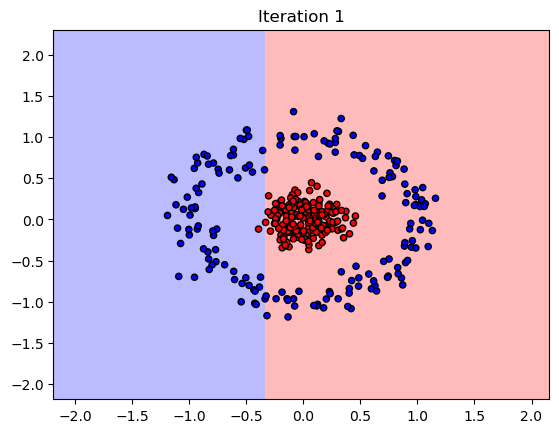

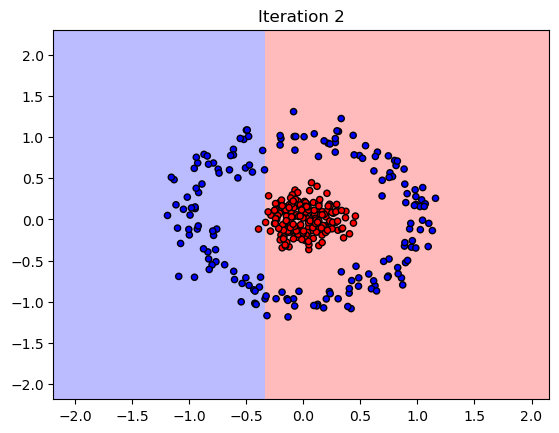

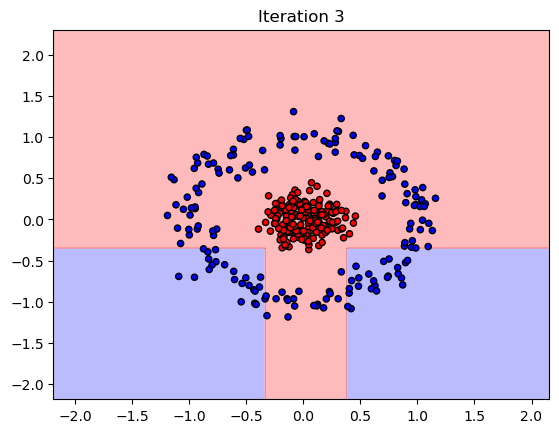

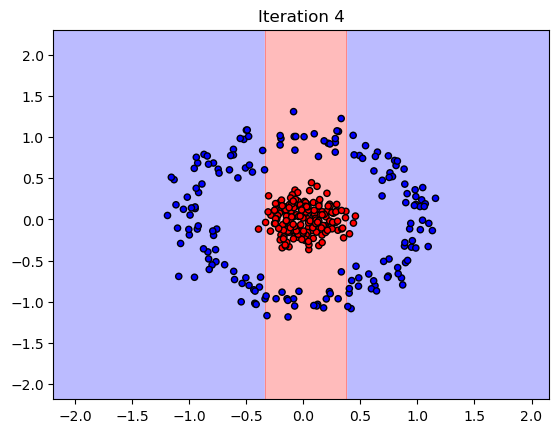

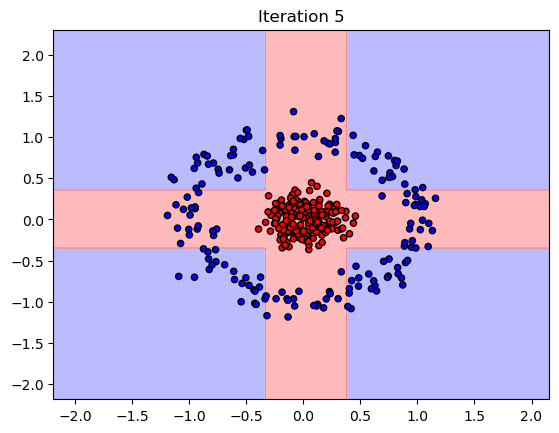

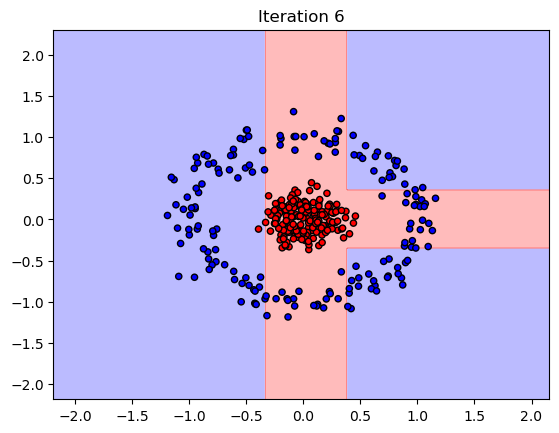

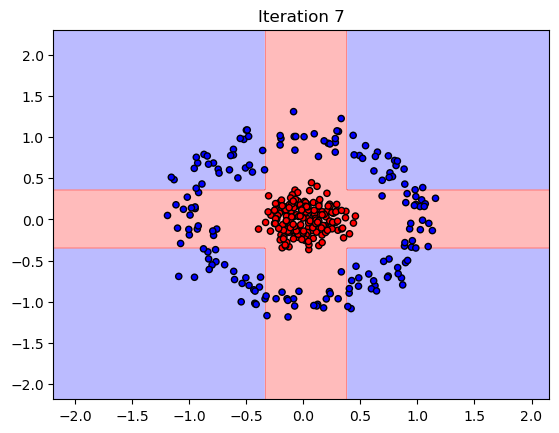

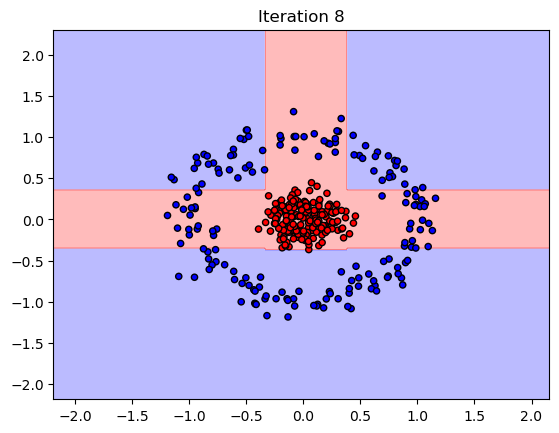

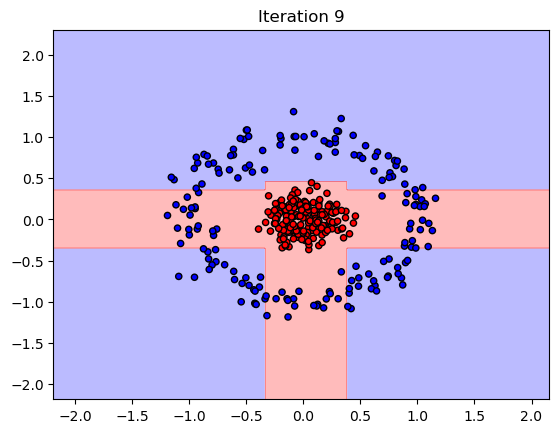

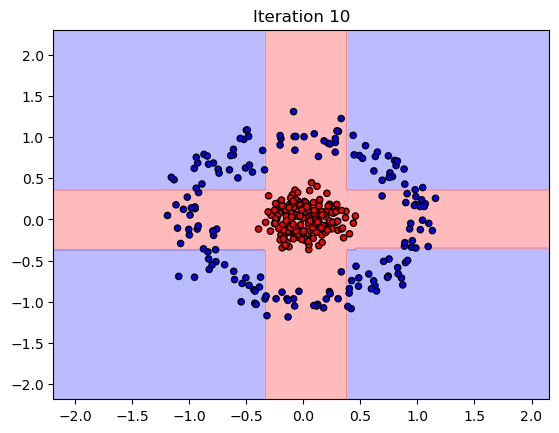

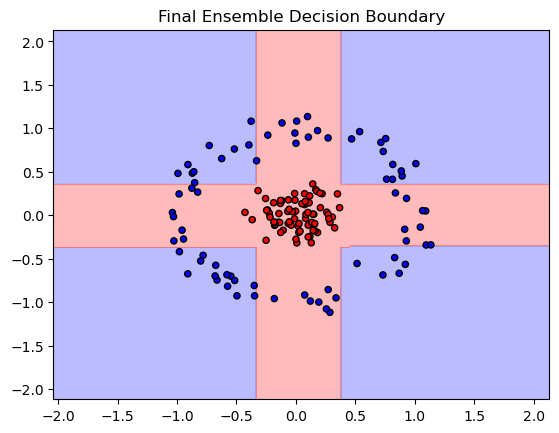

In [5]:
AB = AdaBoost(n_clf=10, eta=0.5)
AB.fit(X_train, y_train)
AB.plot_decision_boundary(X_test, y_test, title="Final Ensemble Decision Boundary")

# Task - 2

In [6]:
class AdaBoost:
    def __init__(self, base_clf, n_clf=10, eta=0.5):
        self.base_clf = base_clf
        self.n_clf = n_clf  
        self.eta = eta  
        self.clfs = []  
        self.alphas = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        w = np.ones(n_samples) / n_samples
        
        for t in range(self.n_clf):
            clf = self.base_clf()

            if has_fit_parameter(clf, "sample_weight"):
                clf.fit(X, y, sample_weight=w)
            else:
                clf.fit(X, y)
                
            y_pred = clf.predict(X)
            error = np.sum(w * (y_pred != y)) / np.sum(w)
            if error > 0.5:
                continue
            alpha = 0.5 * np.log((1 - error) / (error + 1e-10)) * self.eta
            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)
            self.clfs.append(clf)
            self.alphas.append(alpha)

            self.plot_decision_boundary(X, y, f"Iteration {t+1}")

    def predict(self, X):
        clf_preds = [alpha * clf.predict(X) for clf, alpha in zip(self.clfs, self.alphas)]
        return np.sign(np.sum(clf_preds, axis=0))

    def plot_decision_boundary(self, X, y, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k', s=20)
        plt.title(title)
        plt.show()

In [7]:
def run_adaboost_with_classifier(name, clf_func):
    print(f"Running AdaBoost with {name} as weak classifier...")
    ada = AdaBoost(base_clf=clf_func, n_clf=10, eta=0.5)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracy = np.mean(y_pred == y_test) * 100
    print(f"Accuracy with {name}: {accuracy:.2f}%")
    ada.plot_decision_boundary(X_test, y_test, title=f"Final Decision Boundary: {name}")

##### Adaboost with Logistic Regression

Running AdaBoost with Logistic Regression as weak classifier...


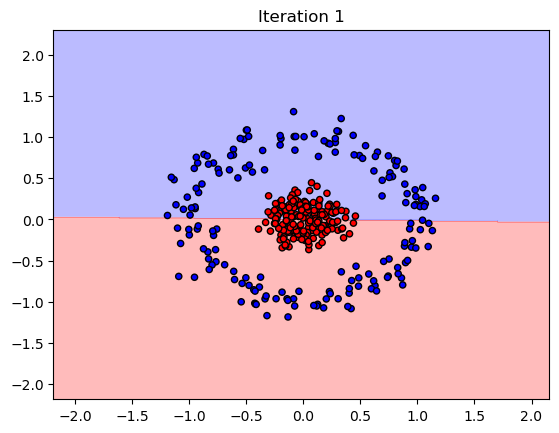

Accuracy with Logistic Regression: 50.00%


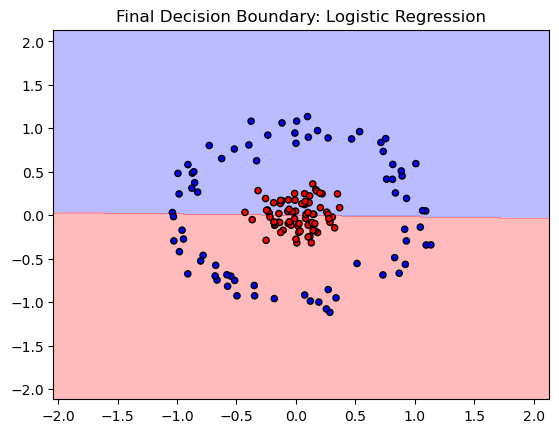

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import has_fit_parameter
run_adaboost_with_classifier("Logistic Regression", lambda: LogisticRegression())

#### Adaboost with Decision Stump

Running AdaBoost with Decision Stump as weak classifier...


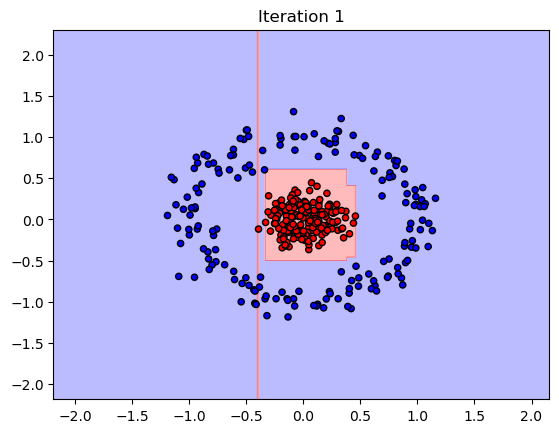

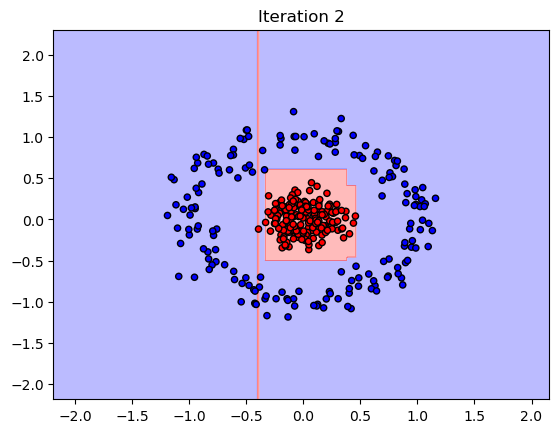

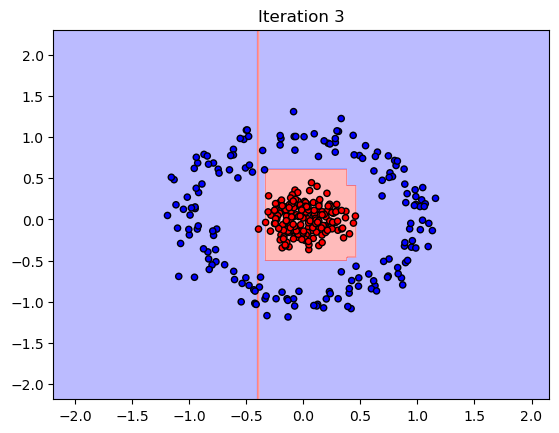

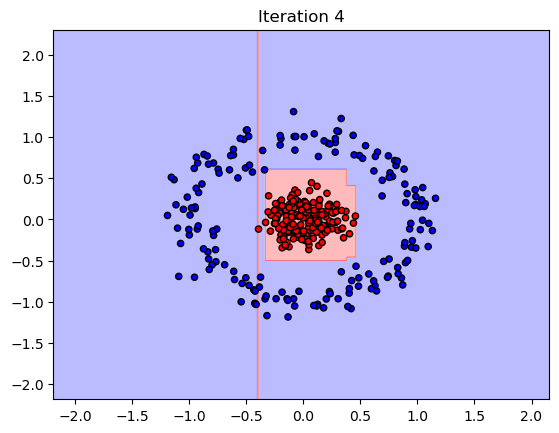

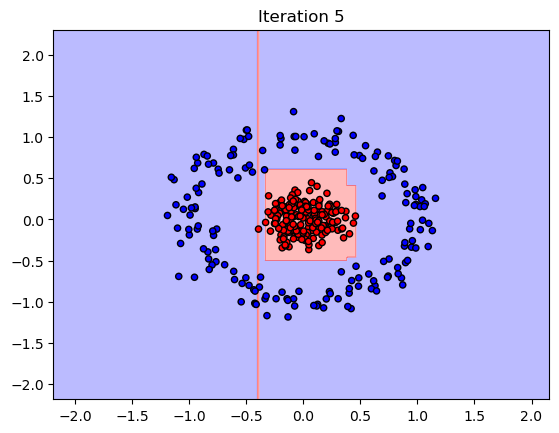

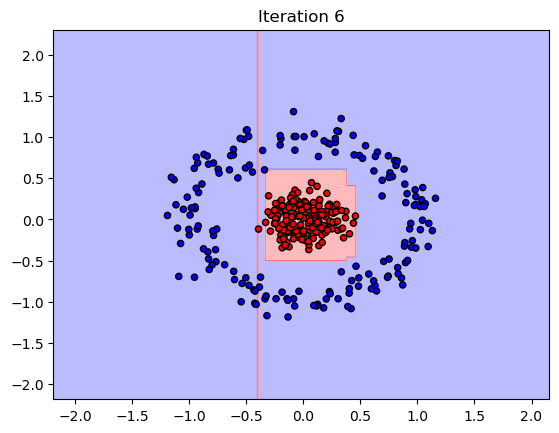

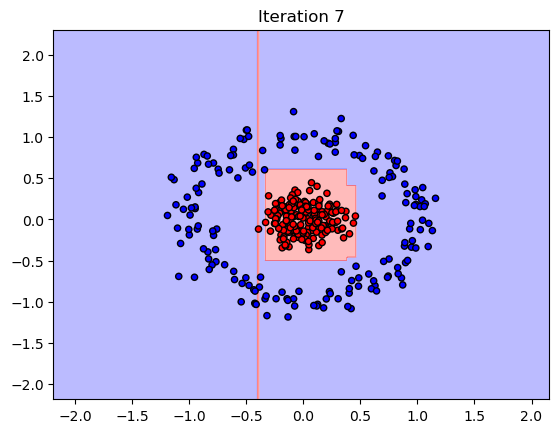

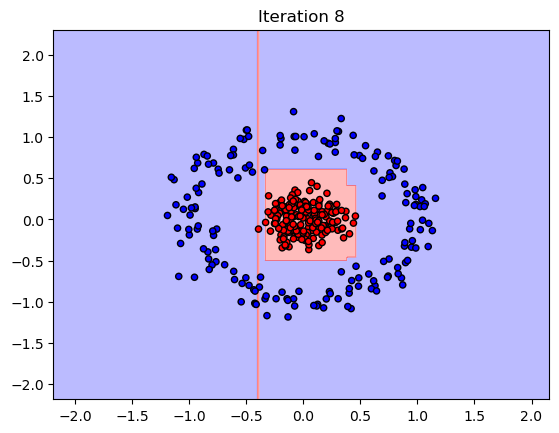

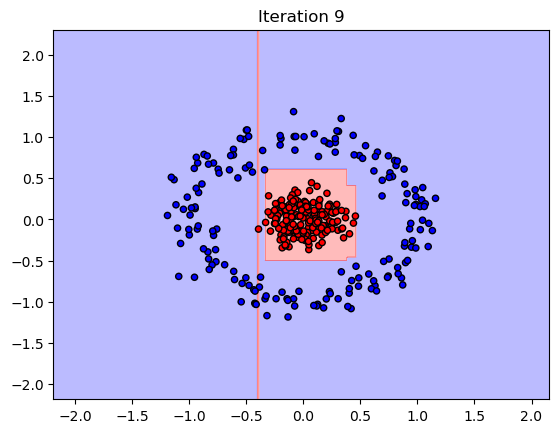

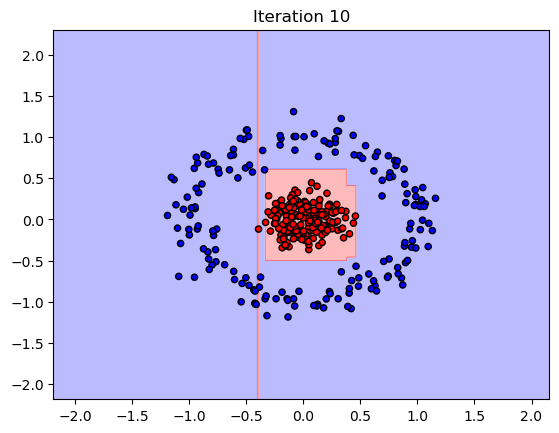

Accuracy with Decision Stump: 98.00%


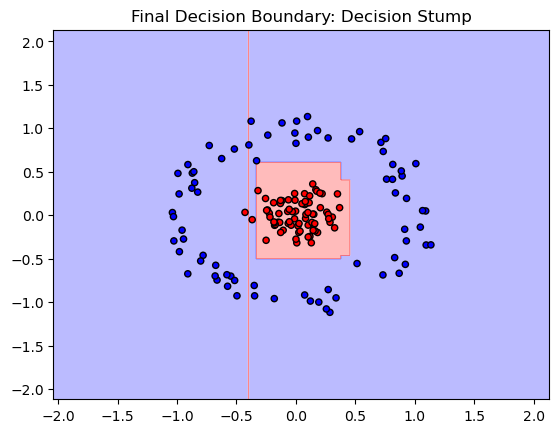

In [9]:
run_adaboost_with_classifier("Decision Stump", lambda: DecisionTreeClassifier(max_depth=5))

##### Adaboost with Decision Tree(Depth = 8)

Running AdaBoost with Decision Tree (depth=8) as weak classifier...


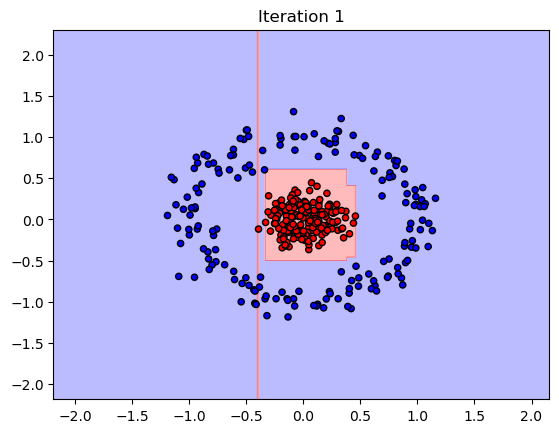

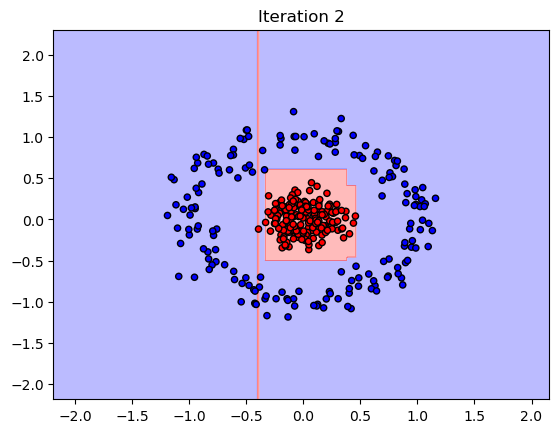

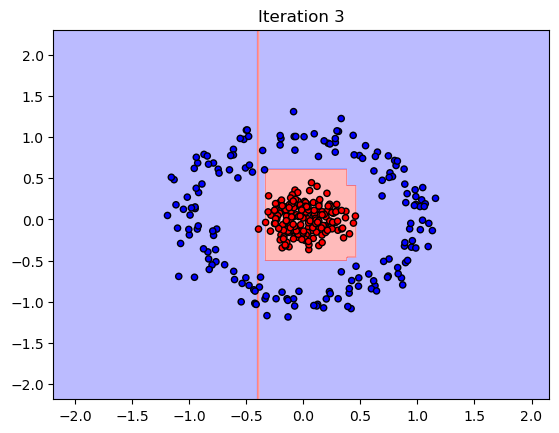

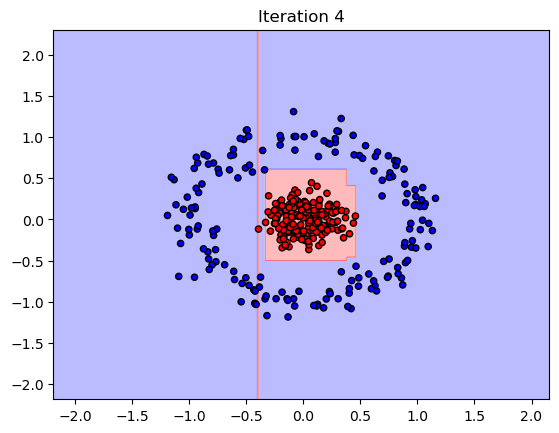

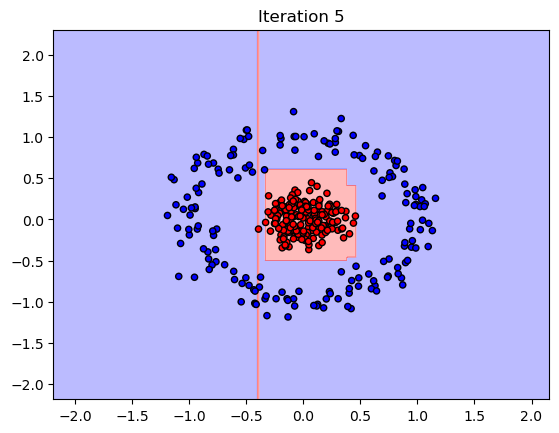

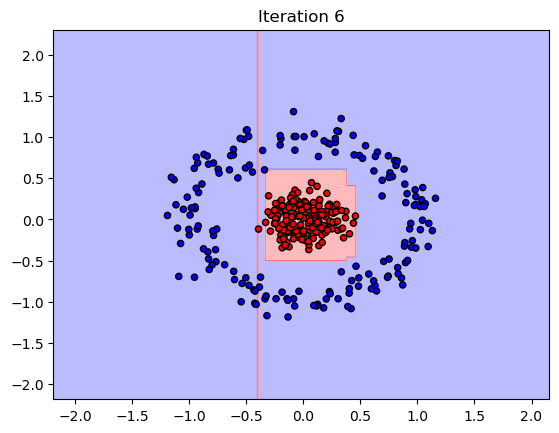

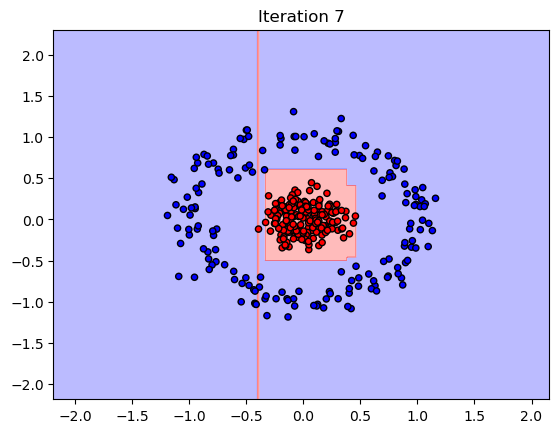

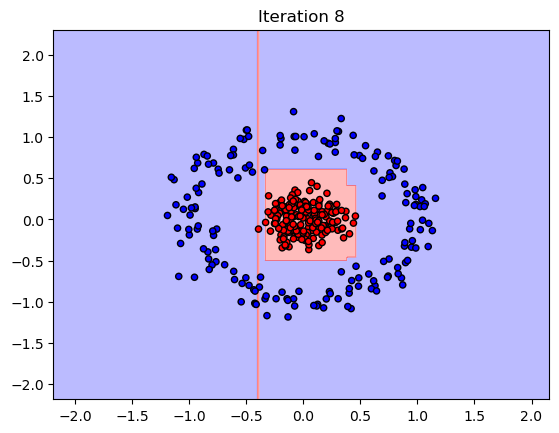

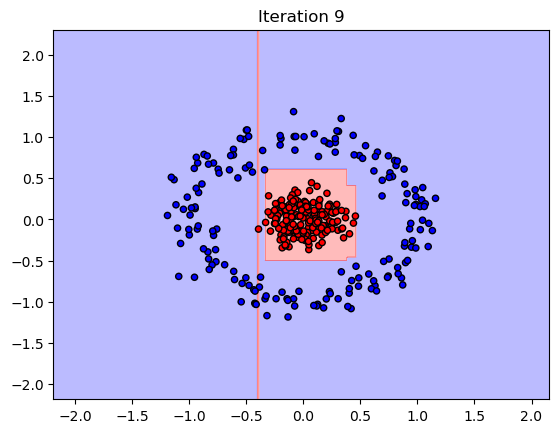

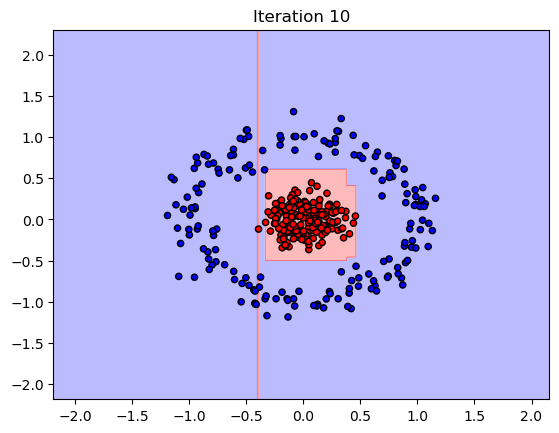

Accuracy with Decision Tree (depth=8): 98.00%


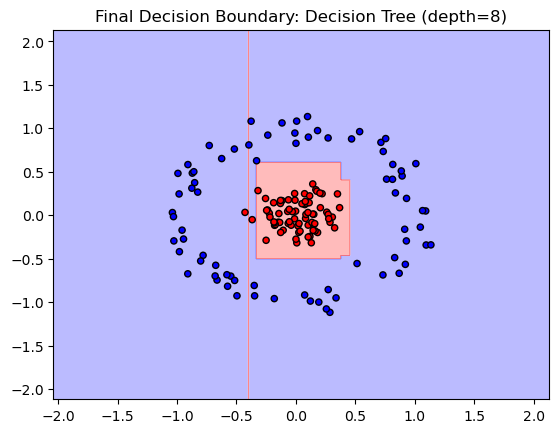

In [10]:
run_adaboost_with_classifier("Decision Tree (depth=8)", lambda: DecisionTreeClassifier(max_depth=8))

#### Adaboost with Linear SVM

Running AdaBoost with Linear SVM as weak classifier...


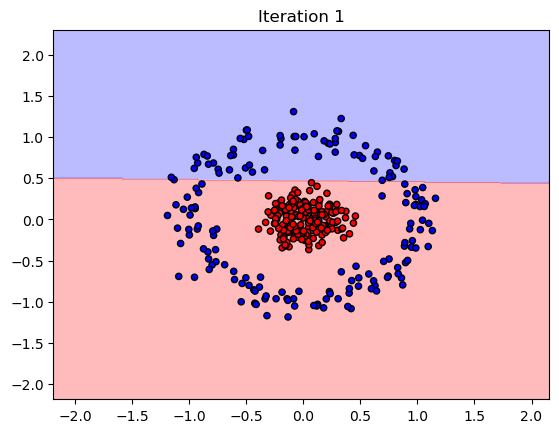

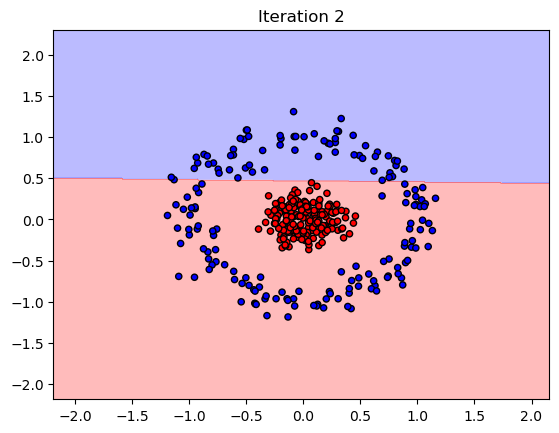

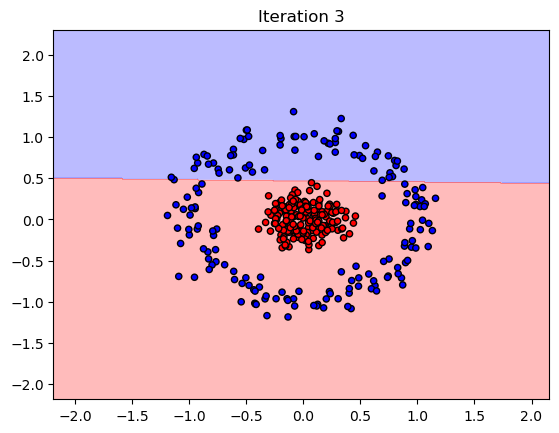

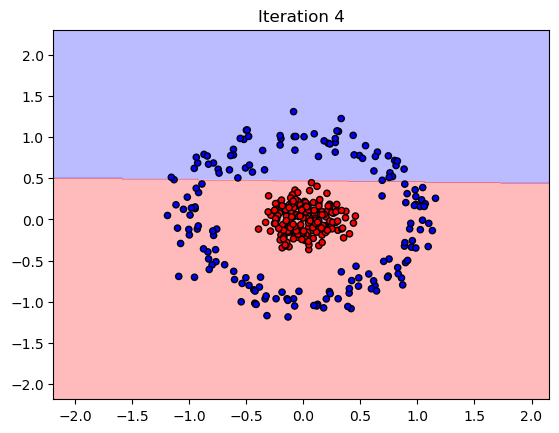

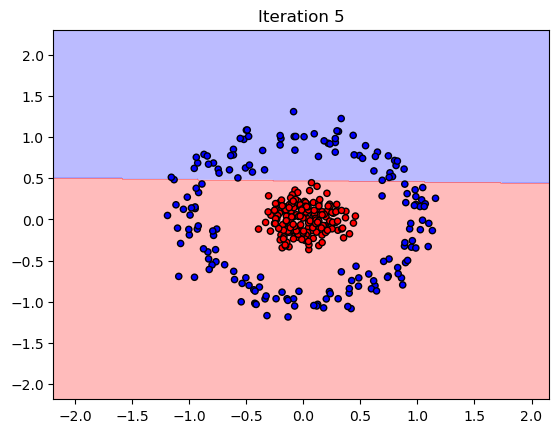

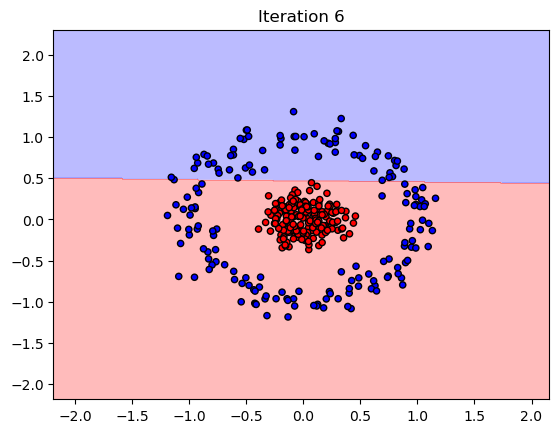

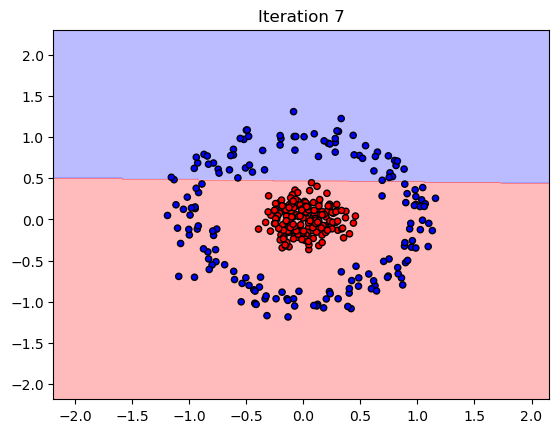

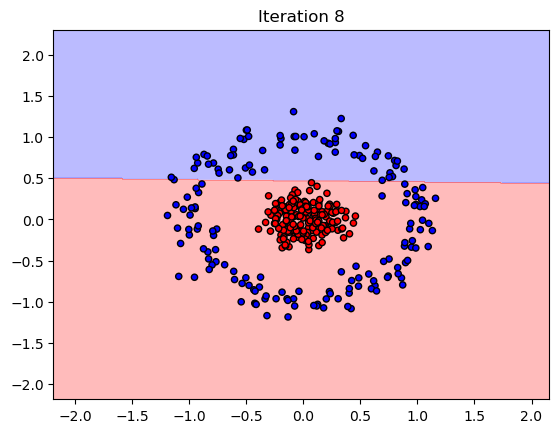

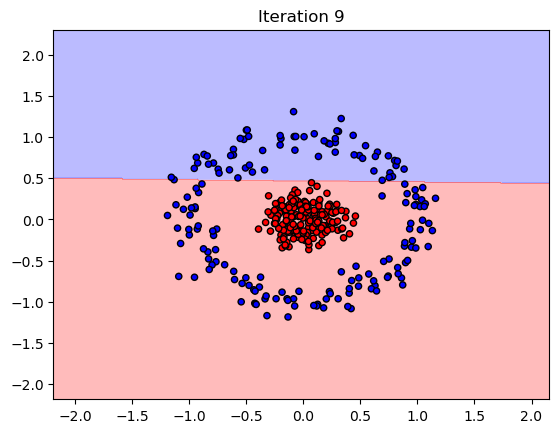

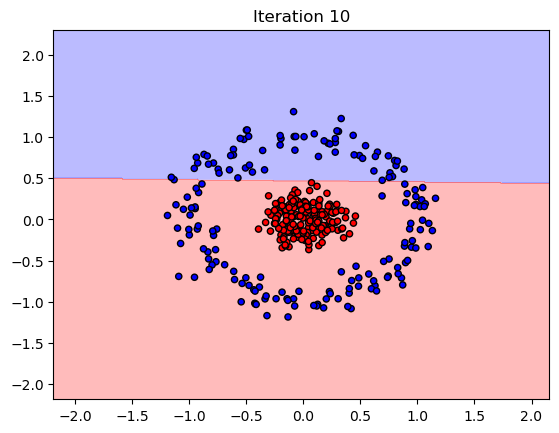

Accuracy with Linear SVM: 67.33%


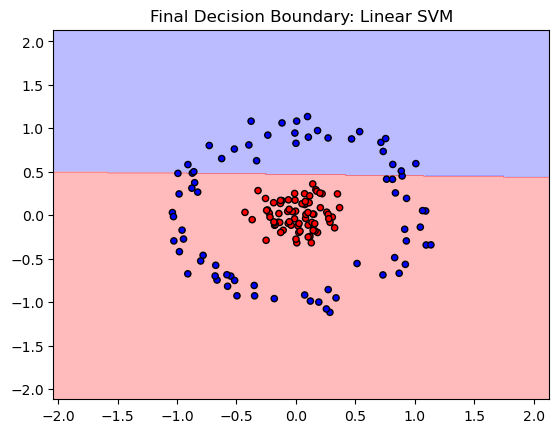

In [11]:
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
run_adaboost_with_classifier("Linear SVM", lambda: SVC(kernel='linear', C=0.1))

#### Adaboost with LDA

Running AdaBoost with LDA as weak classifier...


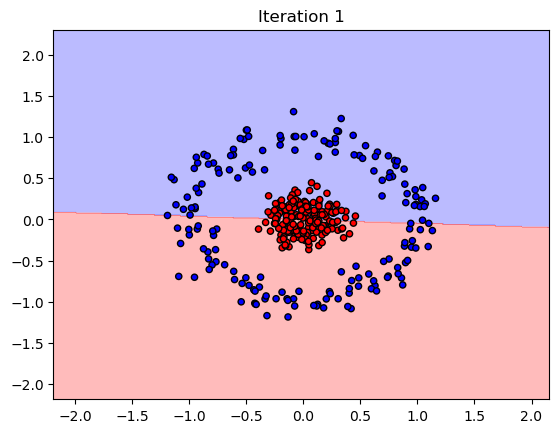

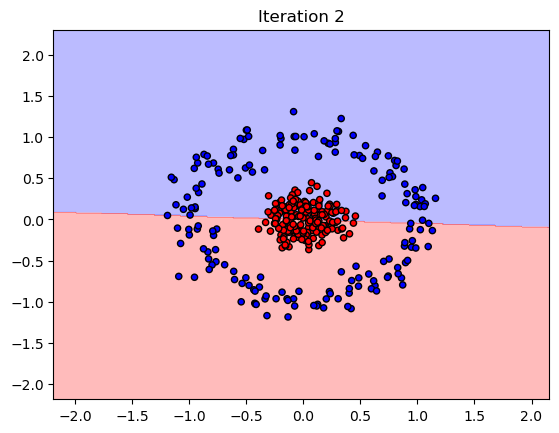

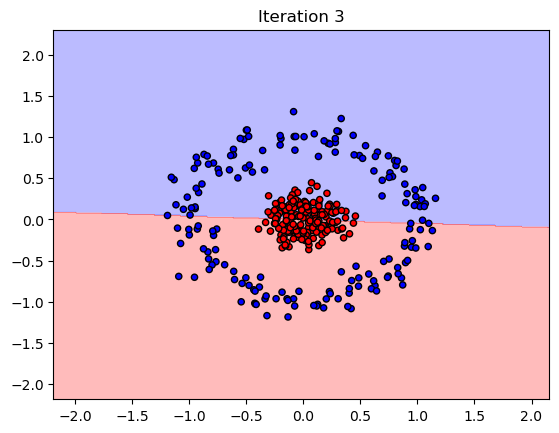

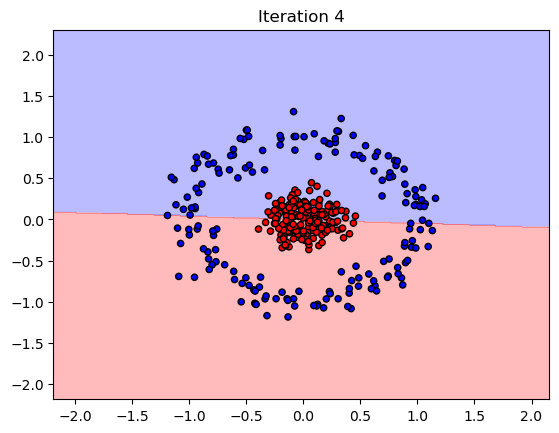

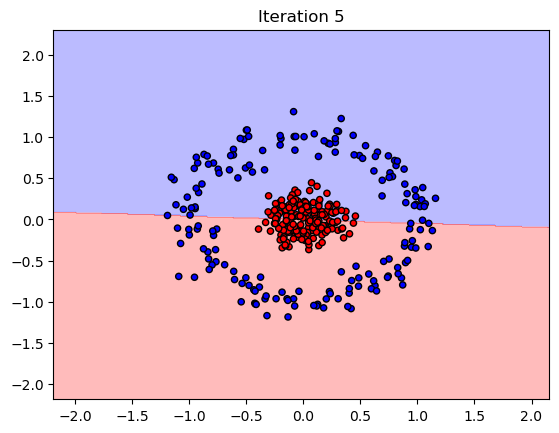

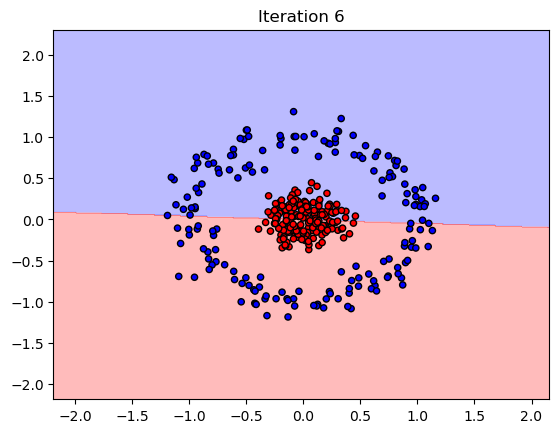

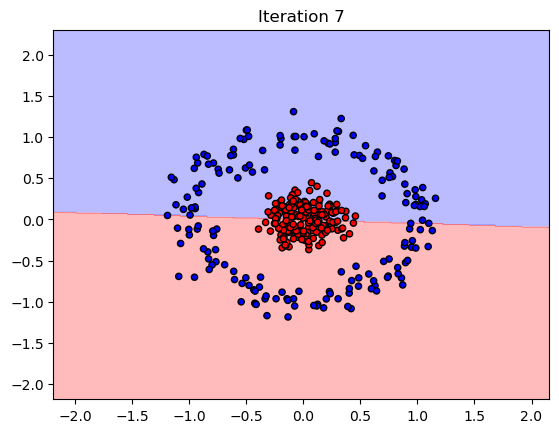

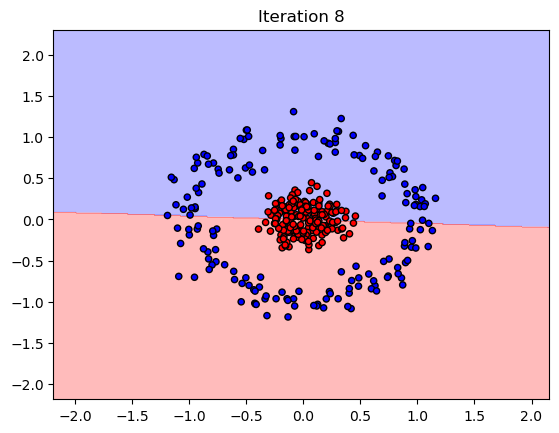

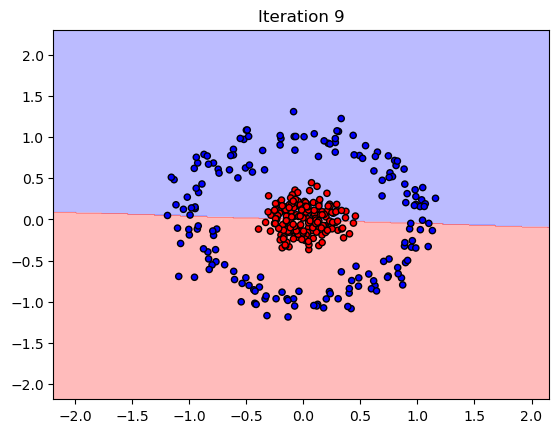

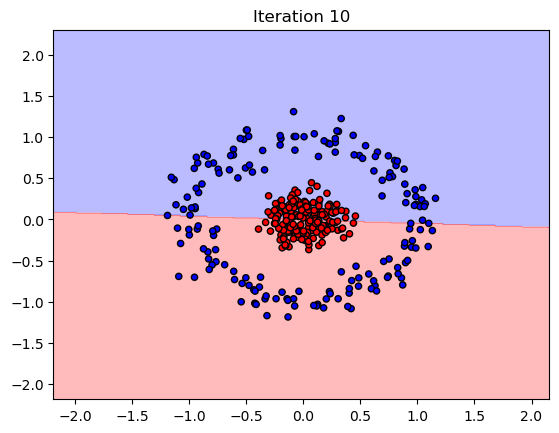

Accuracy with LDA: 49.33%


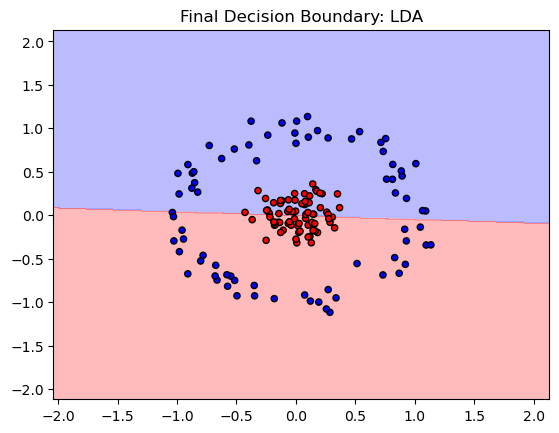

In [12]:
run_adaboost_with_classifier("LDA", lambda: LDA())